<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations - Jonatan Rivera

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

# Write *your own* definitions for the following terms:

- **Neuron:**
Within an artificial neural network, a neuron is a mathematical function that mimics a biological neuron. Typically, a neuron computes the weighted sum of its input, and this sum is passed through a nonlinear function, often called activation function, such as the sigmoid. 
- **Input Layer:**
Input layer — initial data for the neural network.
- **Hidden Layer:**
intermediate layer between input and output layer and place where all the computation is done.
- **Output Layer:**
produce the result for given inputs.
- **Activation Function:**
In Neural Network the activation function defines if given node should be “activated” or not based on the weighted sum

# Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

As I understand it, backpropagation is a process that allows us  to update or weights based on the gradient of the loss function with respect to the weights of the network.
In otherwords, we can improve our nueronetwork by updating the weights using this process,which ultimately has an impact on how the input data is better processed to help us get the 
best possible prediction.


# Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

A simple perceprton consists of four main things Input values, Weights and Bias,the Net sum, and an Activation Function. The process begins by some input data, then the data gets process into a layer that computes the weighted some only to later be passed into the activated function so that we can get a predicted output. 


<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [65]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [67]:

# Construct simple perceptron
model1 = Sequential()
model1.add(Dense(1,input_dim=2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X,y, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 715us/step - loss: 0.9167 - accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 0s 661us/step - loss: 0.9138 - accuracy: 0.5000
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.9107 - accuracy: 0.5000
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.9077 - accuracy: 0.5000
Epoch 5/5
10/10 [==============================] - 0s 982us/step - loss: 0.9048 - accuracy: 0.5000



### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [68]:
# Identify shape of data
X.shape , y.shape

((300, 2), (300,))

In [69]:
# Split and scale the data
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
#Check shape of train val split
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((240, 2), (60, 2), (240,), (60,))

In [70]:
# Construct mycallback class will be instantiate later
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True


In [72]:
# Import modules to implement early stopping in model, and tensorboard to visualize runs if have time
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import tensorflow as tf
import os

logdir = os.path.join("logs", "EarlyStopping-Loss")

# Instantitate mycallback
call_back = myCallback()
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

def create_model(units=30, activation='relu', learning_rate=.01):
    """ This function creates a multilayer perceptron """
    model = tf.keras.Sequential(
       [Dense(units=units,input_shape=(240,2), activation=activation),
       Dense(units=30,activation = 'softmax'),
       Dense(30, activation ='softmax')])
    model.compile(
      optimizer= tf.keras.optimizers.Adamax(learning_rate=learning_rate),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
    return model
model2 = create_model()


h2 = model2.fit(X_train, y_train, epochs=99, 
          validation_data=(X_val,y_val),
          callbacks=[myCallback(), stop])

Epoch 1/99
8/8 [==============================] - 0s 14ms/step - loss: 3.2548 - accuracy: 0.4833 - val_loss: 3.0935 - val_accuracy: 0.5833
Epoch 2/99
8/8 [==============================] - 0s 3ms/step - loss: 2.9794 - accuracy: 0.6542 - val_loss: 2.8326 - val_accuracy: 0.5833
Epoch 3/99
8/8 [==============================] - 0s 4ms/step - loss: 2.7208 - accuracy: 0.6625 - val_loss: 2.5880 - val_accuracy: 0.5333
Epoch 4/99
8/8 [==============================] - 0s 3ms/step - loss: 2.4842 - accuracy: 0.6667 - val_loss: 2.3624 - val_accuracy: 0.5000
Epoch 5/99
8/8 [==============================] - 0s 3ms/step - loss: 2.2668 - accuracy: 0.6667 - val_loss: 2.1567 - val_accuracy: 0.5167
Epoch 6/99
8/8 [==============================] - 0s 3ms/step - loss: 2.0688 - accuracy: 0.6833 - val_loss: 1.9713 - val_accuracy: 0.5333
Epoch 7/99
8/8 [==============================] - 0s 3ms/step - loss: 1.8888 - accuracy: 0.6667 - val_loss: 1.8054 - val_accuracy: 0.5167
Epoch 8/99
8/8 [=================

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [73]:
!pip install mlxtend

ValueError: cannot reshape array of size 11197440 into shape (432,864)

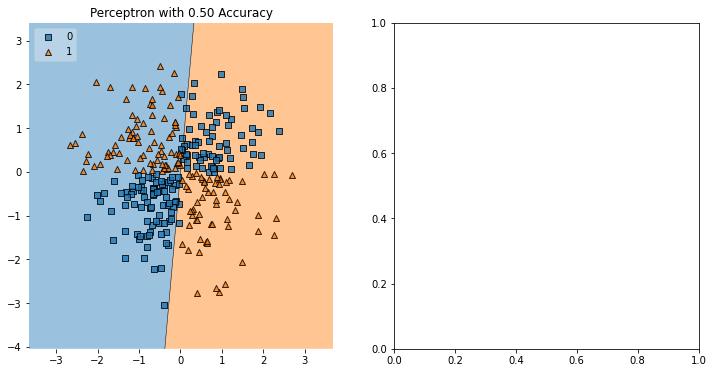

In [74]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In [93]:
# Your Answer Here - Change the Cell to Markdown
#My first model achieves an accuracy of around 50% , and this may be a result of only have barely any depth, with only one neuron really doing the work.
#Having more depth, more layers allows the model to learn more about the relationship between features and the outputs.Specifically, via backpropigation the neuronetwork updates the weights
#after each training epoch.


## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)

Use an appropriate loss function for a binary classification task

Use an appropriate activation function on the final layer of your network.

Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)

When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [130]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [131]:
# Create wrangle function
def wrangle(df):
    """This function helps clean dataframe"""
    df = df.dropna()
    return df

# Wrangle feature matrix
X = wrangle(df.copy())

# Separate labels from feature matrix
y = X.pop('target')


In [132]:
# Split and scale the data
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
# Check shape of train val split
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((242, 13), (61, 13), (242,), (61,))

In [133]:
def create_model2(units=30, activation='relu', learning_rate=.01):
    """ This function creates a multilayer perceptron """
    model = tf.keras.Sequential(
       [Dense(units=units,input_shape=(242,13), activation=activation),
       Dense(units=30,activation = 'softmax'),
       Dense(30, activation ='softmax')])
    model.compile(
      optimizer= tf.keras.optimizers.Adamax(learning_rate=learning_rate),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
    return model

In [134]:
# Scale data, helps neuronetworks process the data faster
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.fit_transform(X_val)

In [135]:
# create model
# Import kerasclassifier,gridsearch cv helps with implementing neurnetwork model into scikitlearns gridsearch cv
# So that we can optimize hyperparameters
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model2, verbose=1)

# Define the grid search parameters
param_grid = {'learning_rate':[.01,.001],
              'units': [10,20],
              'activation':['relu','sigmoid'],
              'epochs': [5,10],
              # paramswrapper --we use scikit learn conforms the model scikit learn api
              }

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=2,verbose=1)

grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")


Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Epoch 1/10


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    4.0s finished


8/8 [==============================] - 0s 1ms/step - loss: 3.2612 - accuracy: 0.4959
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 2.9683 - accuracy: 0.7645
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 2.7003 - accuracy: 0.7934
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 2.4571 - accuracy: 0.7934
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 2.2396 - accuracy: 0.7893
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 2.0430 - accuracy: 0.7934
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 1.8645 - accuracy: 0.8099
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 1.7045 - accuracy: 0.8058
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 1.5597 - accuracy: 0.8347
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 1.4221 - accuracy: 0.8388
Best: 0.7809917330741882 using {'activation': 'rel

In [129]:
# Best: 0.7809917330741882 using {'activation': 'relu', 'epochs': 10, 'learning_rate': 0.01, 'units': 20}

In [136]:
grid.score(X_val,y_val)

2/2 [==============================] - 0s 1ms/step - loss: 1.3795 - accuracy: 0.7869


0.7868852615356445